c:\Users\jurkoml\anaconda3\envs\ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


Sampling: 100%|██████████| 50/50 [05:47<00:00,  6.94s/step]


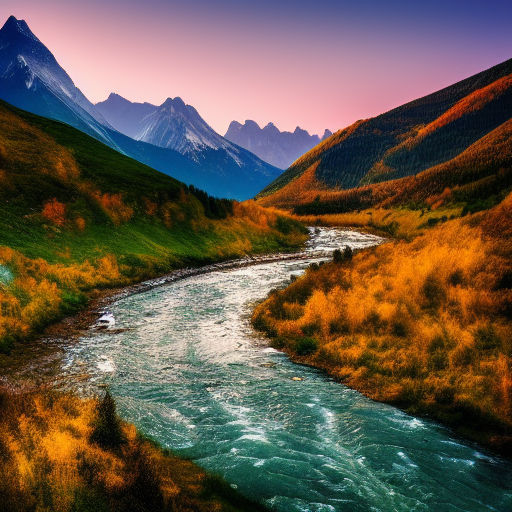

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", "../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, device=DEVICE)

## Text to image

prompt = "A beautiful landscape with mountains and a river, highly detailed, vibrant colors, ultra sharp, cinematic, 8k resolution"
uncond_prompt = "" # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7.0

## Image to image
input_image = None
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path).convert("RGB")
strength = 0.9

sampler_name = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler_name,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    tokenizer=tokenizer,
    idle_device="cpu"
)
Image.fromarray(output_image)